In [1]:
from deap import base
from deap import creator
from deap import tools

import random
import matplotlib.pyplot as plt

import statistics

In [2]:
# problem constants
ONE_MAX_LENGTH = 100 # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 200 # number of individuals in population
P_CROSSOVER = 0.9 # probability for crossover
P_MUTATION = 0.1 # probability for mutating and individual
MAX_GENERATIONS = 50 # stopping condition

In [3]:
# set random seed to test results, turns reproducible
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [4]:
toolbox = base.Toolbox()

In [5]:
# returns 0 or 1 (toolbox.zeroOrOne)
toolbox.register("zeroOrOne", random.randint, 0, 1)

In [6]:
# creating fitness class (creator.FitnessMax)
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) # our goal is to maximize our sum of digits

In [7]:
# creating an individual that extends list class, and initialize with FitnessMax function (creator.Individual)
creator.create("Individual", list, fitness=creator.FitnessMax)

In [8]:
# individual generator (toolbox.individualCreator)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

In [9]:
# population generator
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [10]:
# fitness function definition
def oneMaxFitness(individual):
    return sum(individual), # return a tuple

toolbox.register("evaluate", oneMaxFitness)

In [11]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

In [ ]:
generationCounter = 0
population = toolbox.populationCreator(n=POPULATION_SIZE)

fitnessValues = list(map(toolbox.evaluate, population))

for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue
    
fitnessValues = [individual.fitness.values[0] for individual in population]

maxFitnessValues = [] # statistic to compute for each generation
meanFitnessValues = [] # statistic to compute for each generation

while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
    generationCounter += 1
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            toolbox.mate(child1, child2) # modify in place
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < P_MUTATION:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
    freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
    for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
        individual.fitness.values = fitnessValue

    population[:] = offspring
    fitnessValues = [ind.fitness.values[0] for ind in population]
    maxFitness = max(fitnessValues)
    meanFitness = statistics.mean(fitnessValues)
    best_index = fitnessValues.index(maxFitness)
    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness)
    print("- Generation {}: Max Fitness = {}, Avg Fitness = {}, Best Individual = {}".format(generationCounter
                                                                                        , maxFitness
                                                                                        , meanFitness
                                                                                        , best_index))

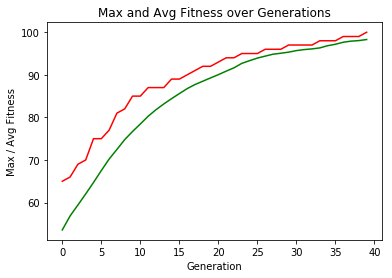

In [13]:
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Avg Fitness')
plt.title('Max and Avg Fitness over Generations')
plt.show()